In [ ]:
#------------------------------ASSIGNMENT-17--------------------------!

In [ ]:
#------------------------------SVM-------------------------------------

In [3]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
# Loading the Dataset
data = pd.read_csv("C:\\Users\\Ashish\\Downloads\\Data Science Assignments\\SVM\\mushroom.csv")

In [7]:
#Basic dataset information
print("Dataset Shape:", data.shape)
print("First Few Rows:\n", data.head())

Dataset Shape: (2000, 26)
First Few Rows:
    Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring

In [9]:
print("Data Types:\n", data.dtypes)

Data Types:
 Unnamed: 0                    int64
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object


In [11]:
print("Summary:\n", data.describe(include='all'))

Summary:
          Unnamed: 0 cap_shape cap_surface cap_color bruises  odor  \
count   2000.000000      2000        2000      2000    2000  2000   
unique          NaN         5           4         9       2     9   
top             NaN    sunken       scaly     brown     yes  foul   
freq            NaN       439         568       263    1023   274   
mean     624.974000       NaN         NaN       NaN     NaN   NaN   
std      375.091938       NaN         NaN       NaN     NaN   NaN   
min        0.000000       NaN         NaN       NaN     NaN   NaN   
25%      290.000000       NaN         NaN       NaN     NaN   NaN   
50%      607.000000       NaN         NaN       NaN     NaN   NaN   
75%      957.250000       NaN         NaN       NaN     NaN   NaN   
max     1279.000000       NaN         NaN       NaN     NaN   NaN   

       gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
count             2000         2000      2000       2000  ...       2000   
unique   

In [13]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


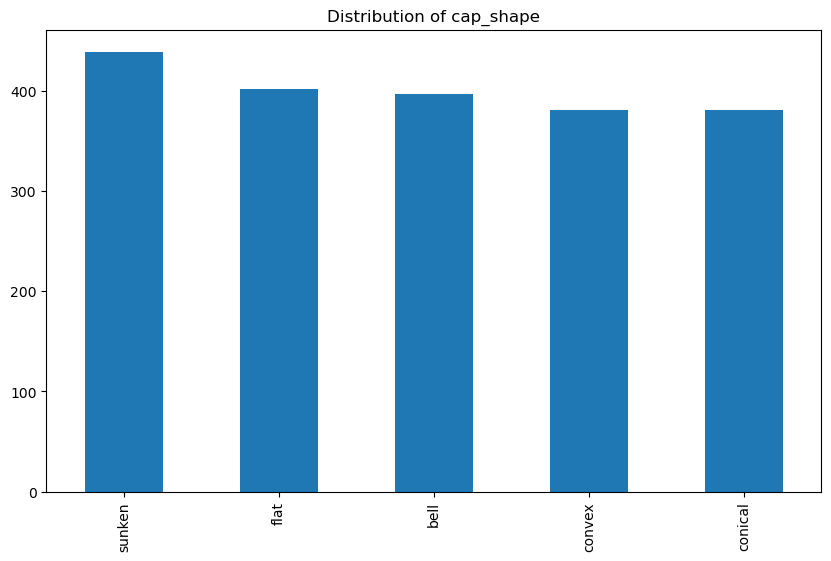

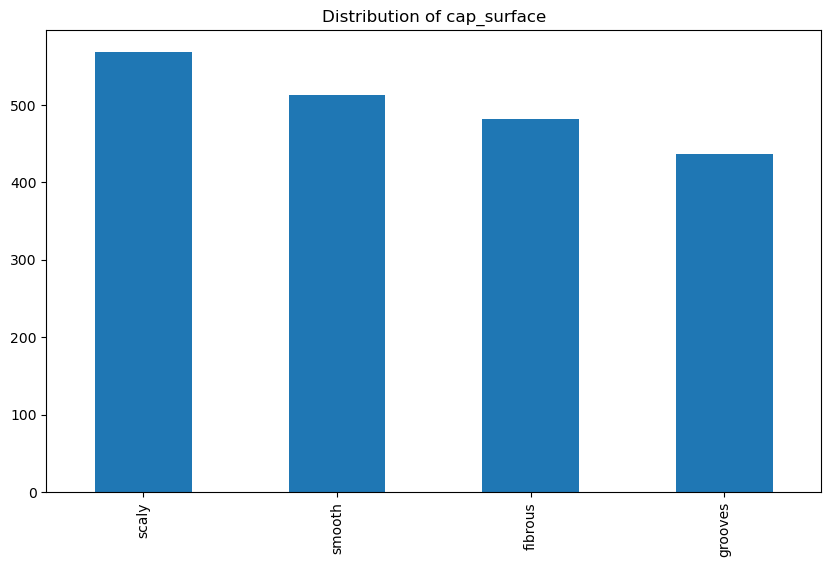

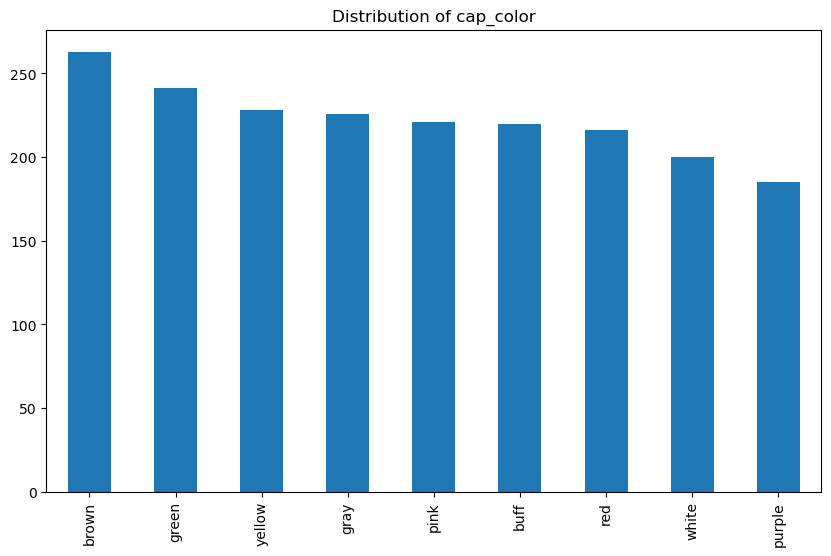

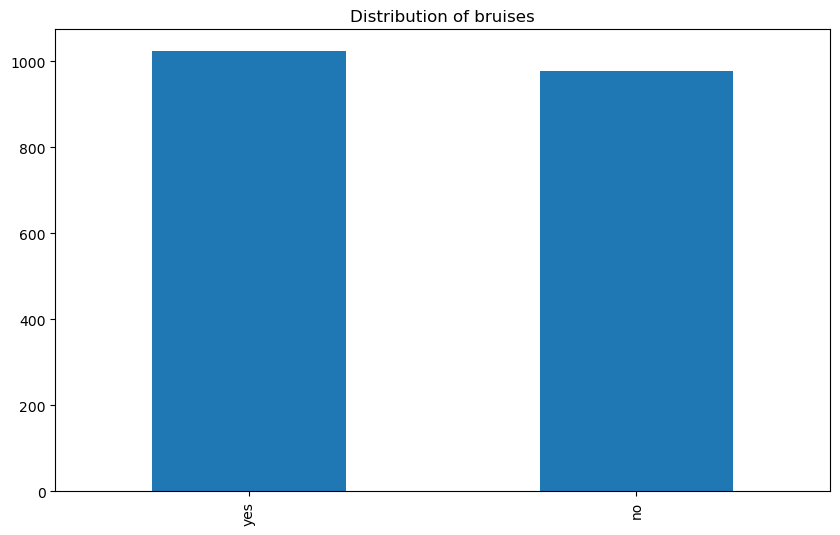

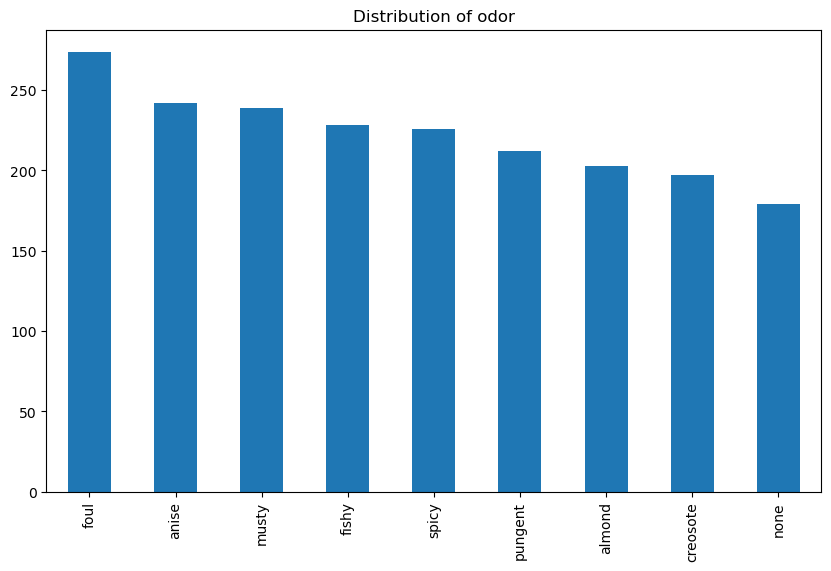

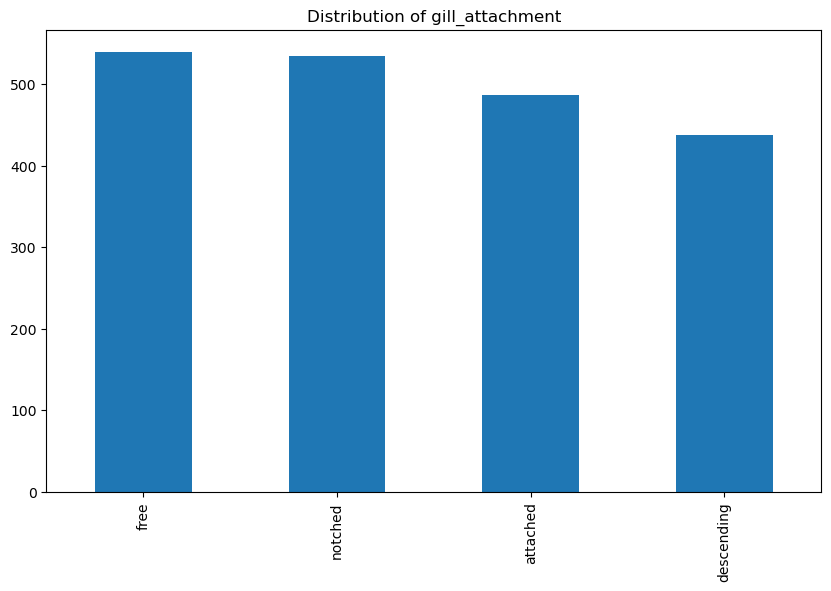

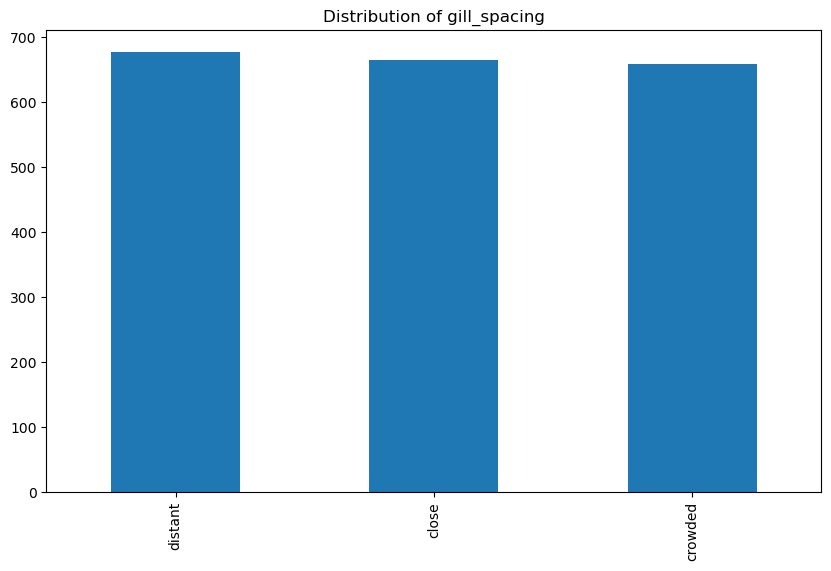

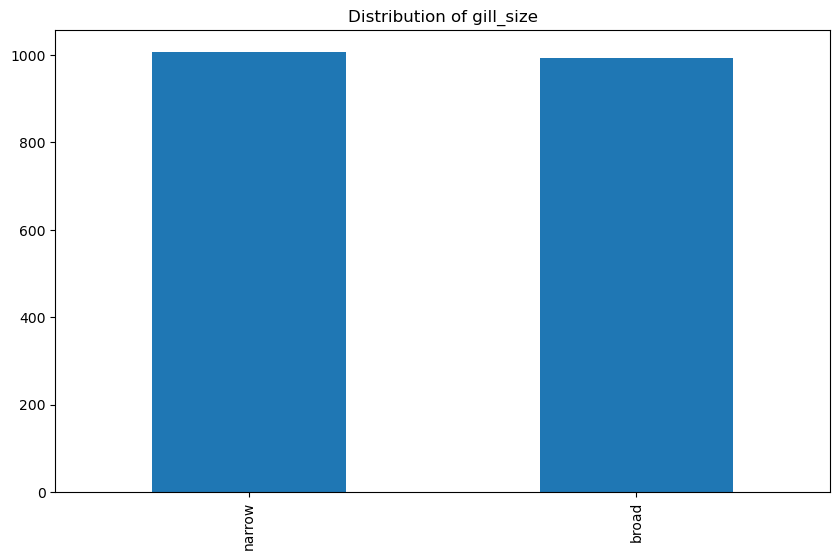

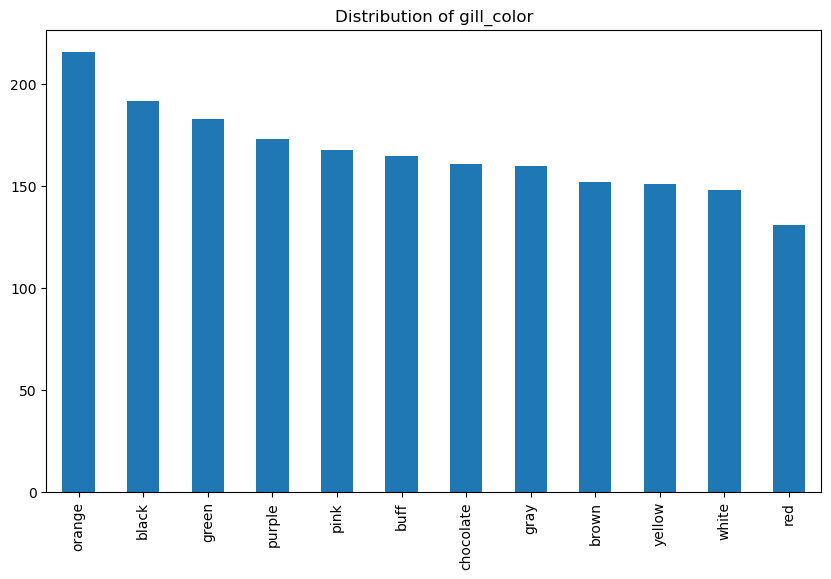

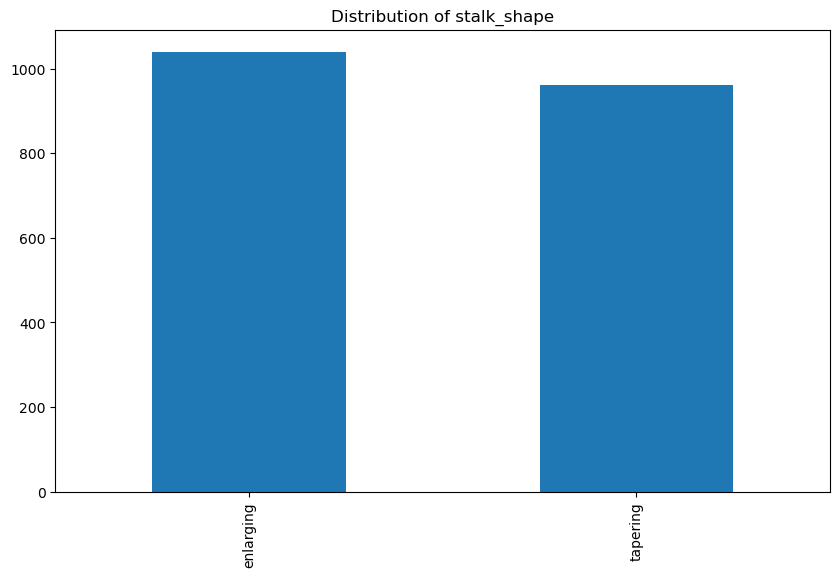

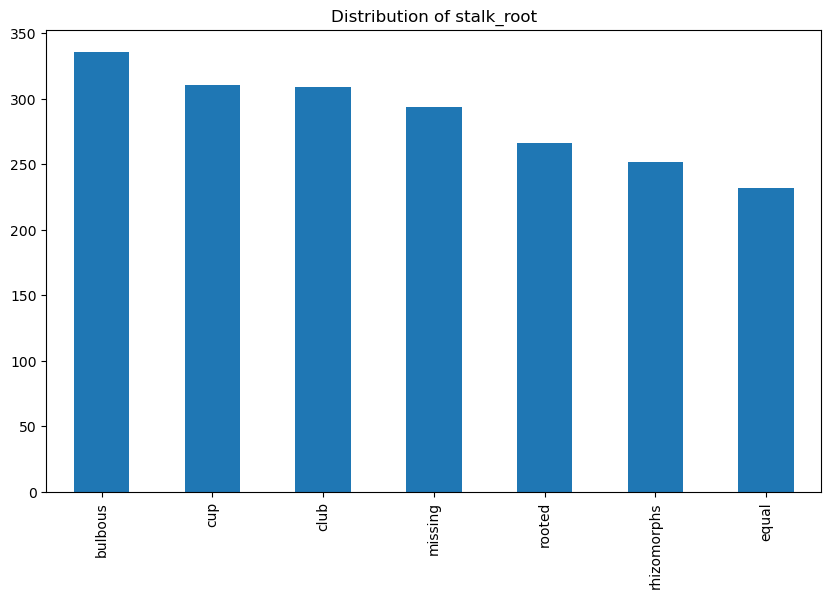

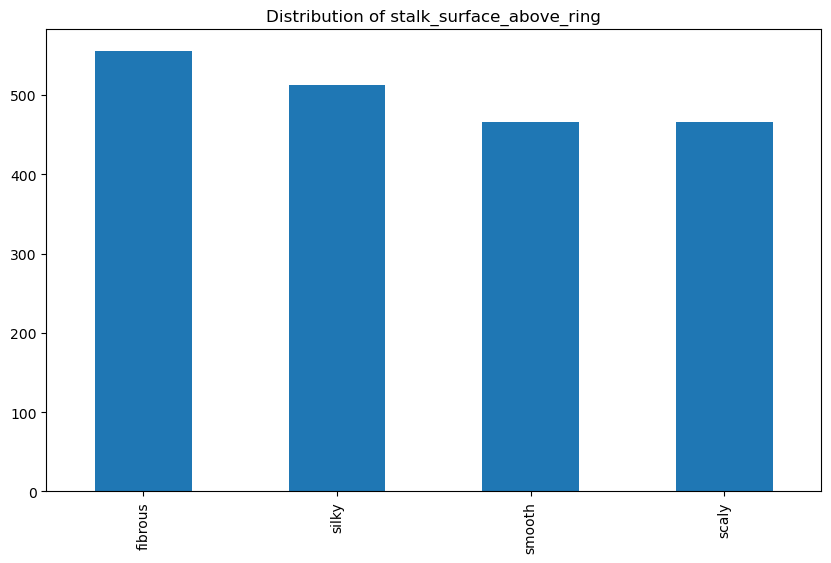

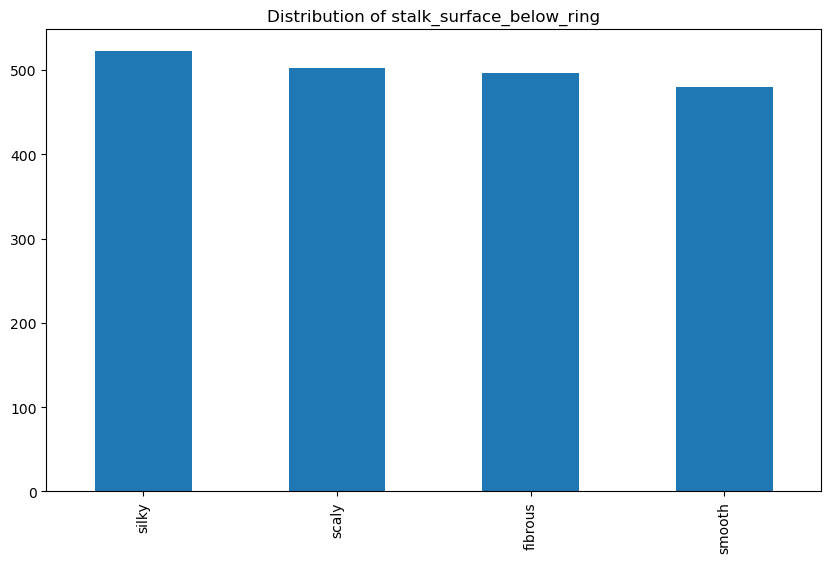

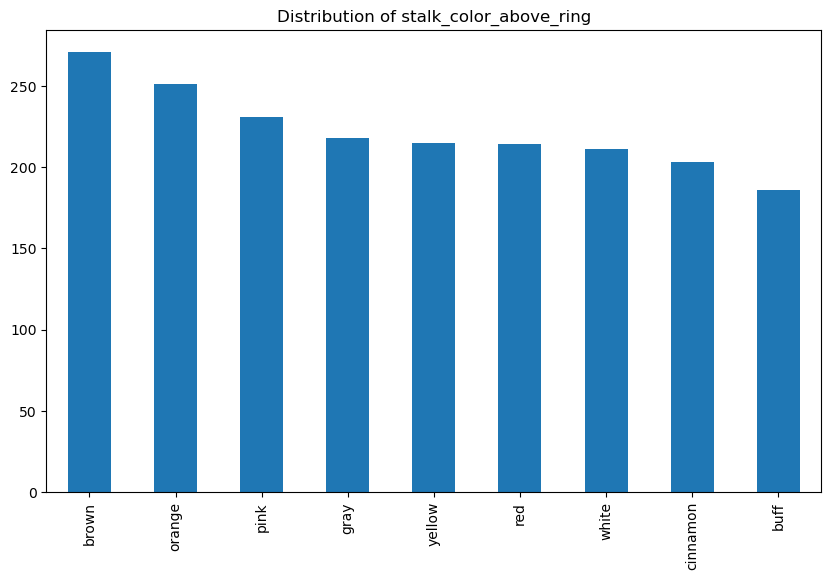

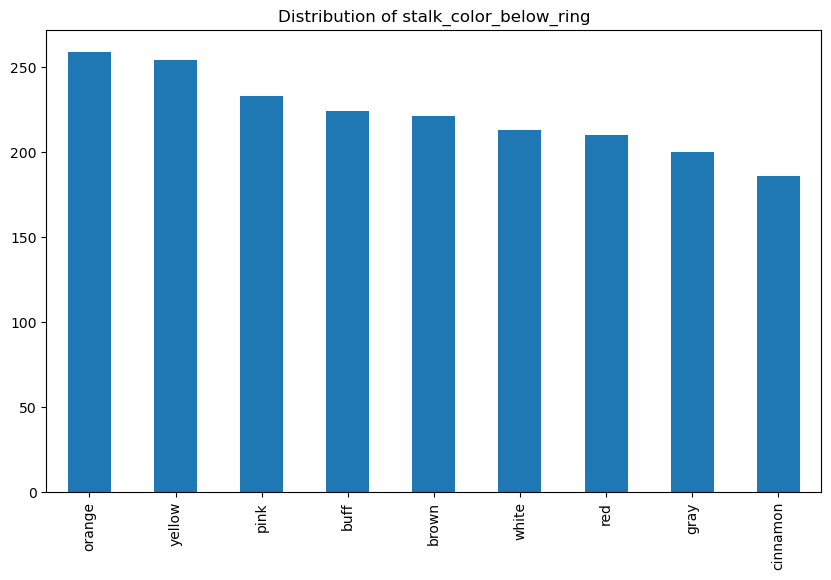

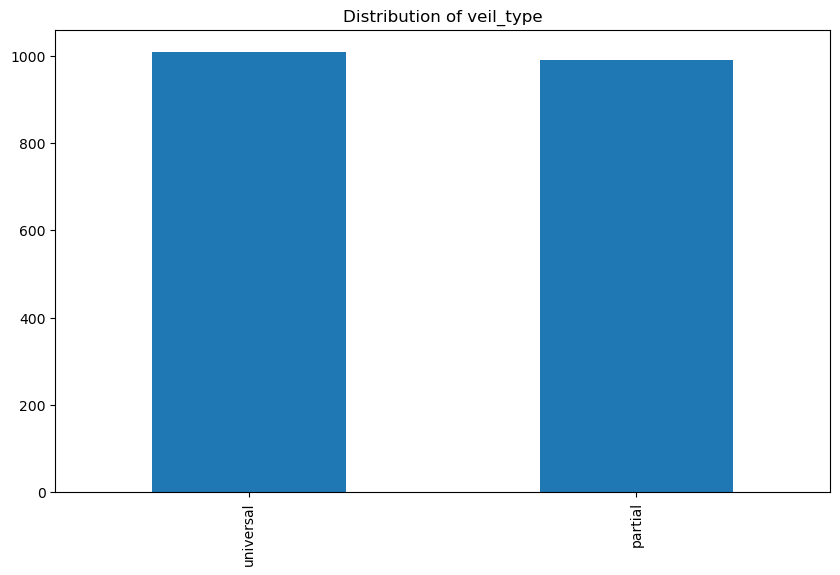

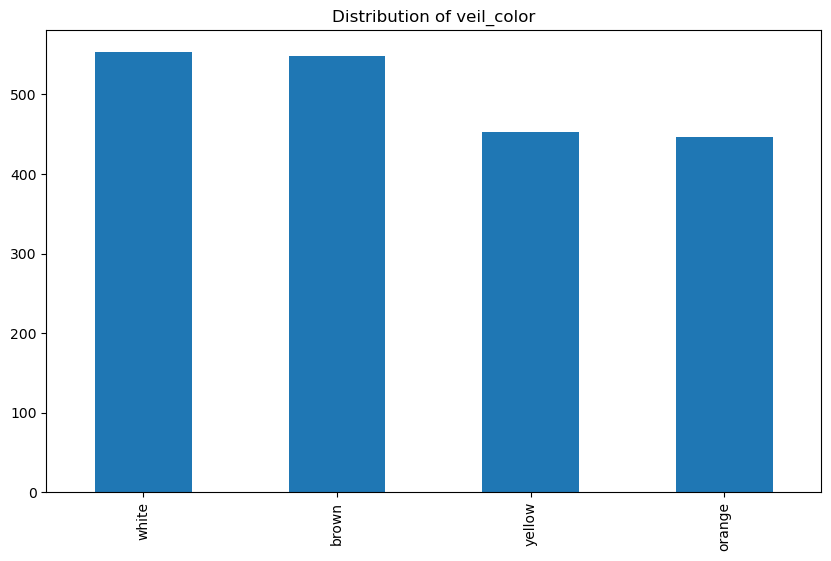

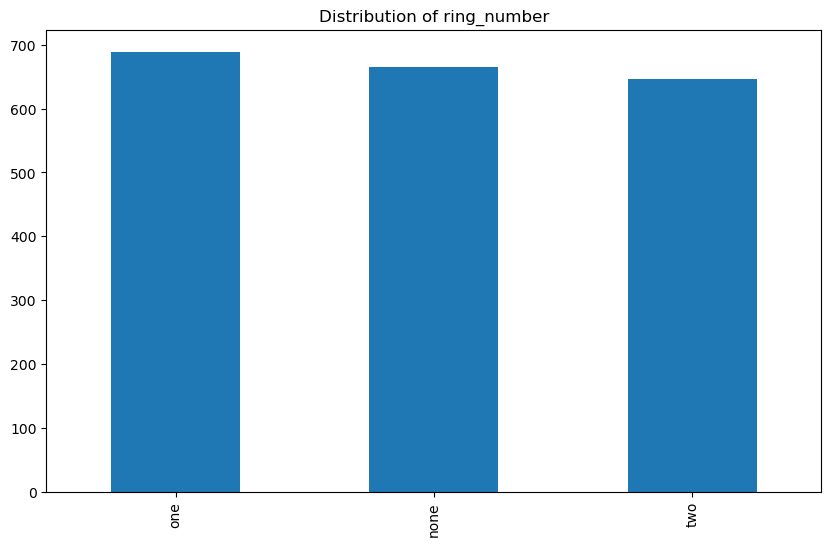

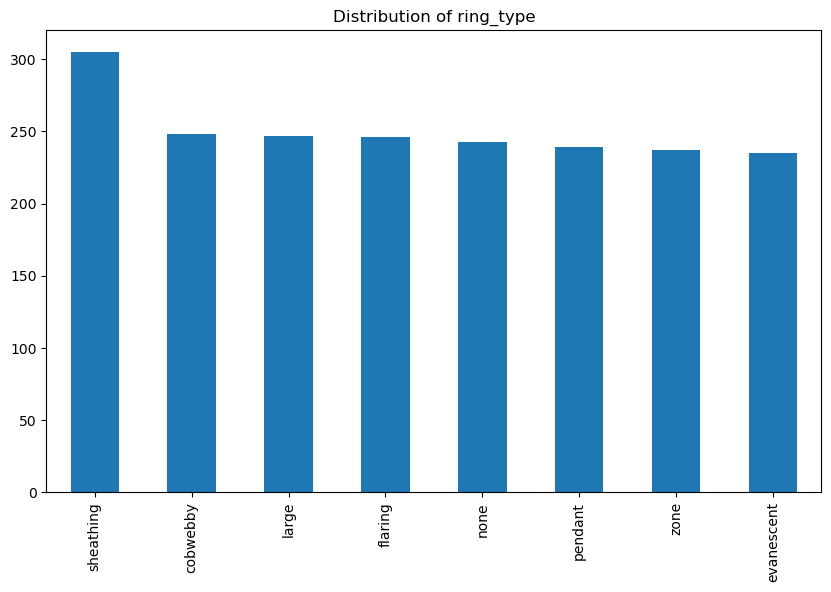

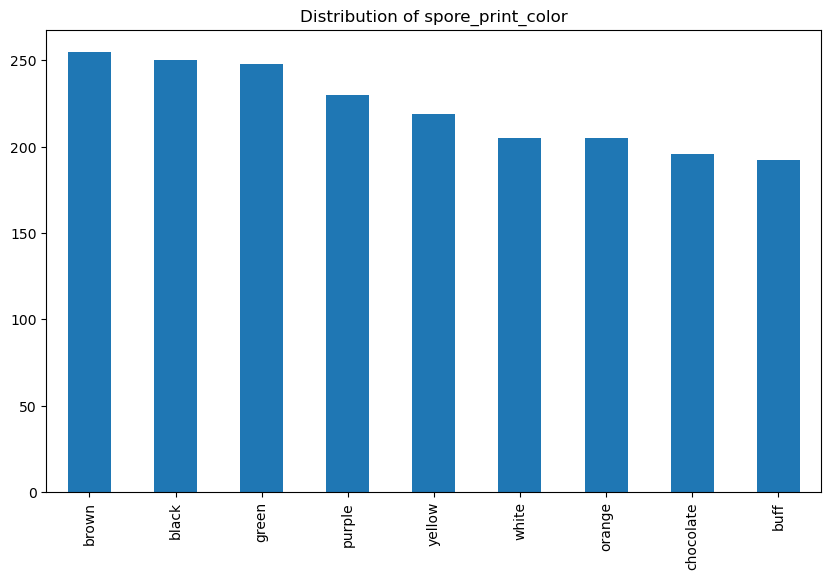

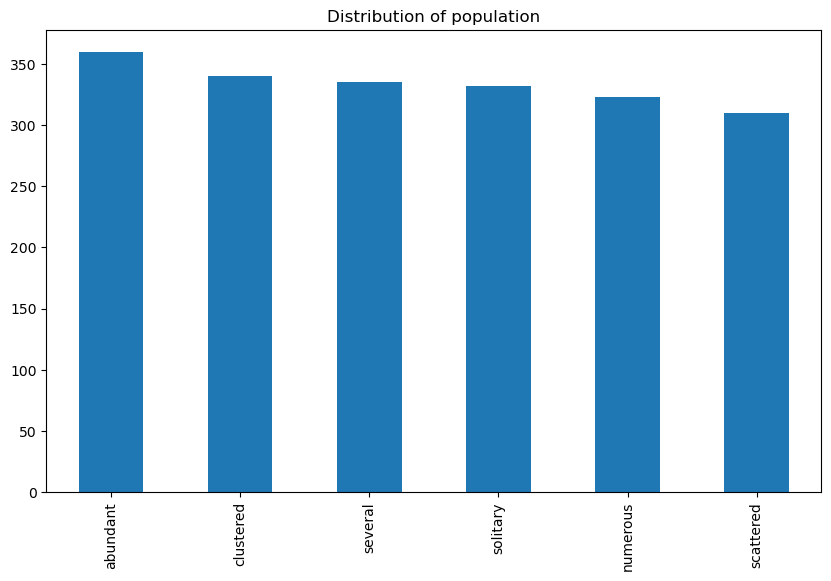

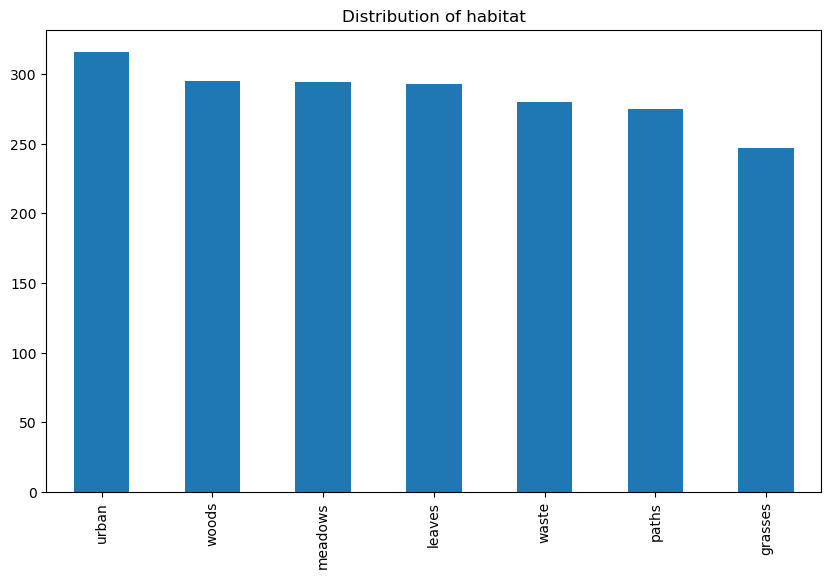

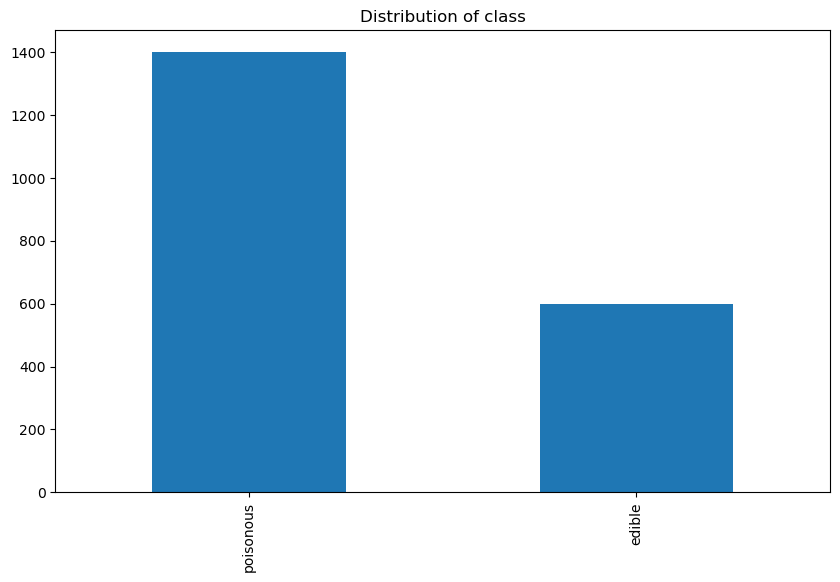

In [15]:
# Plot feature distributions
for column in data.columns[1:24]:
    plt.figure(figsize=(10, 6))
    data[column].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {column}")
    plt.show()

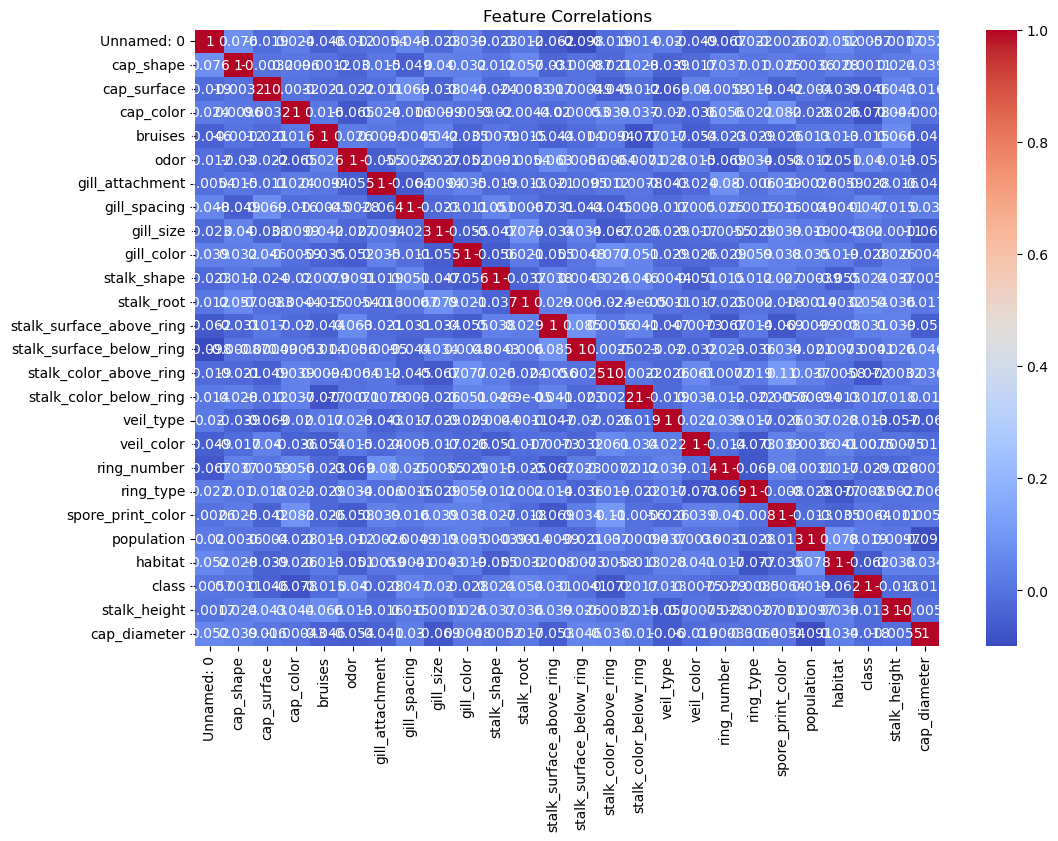

In [17]:
# Investigate correlations
encoded_data = data.apply(LabelEncoder().fit_transform)
correlation_matrix = encoded_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

In [19]:
# Data Preprocessing
# Encoding categorical variables
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [21]:
# Split the dataset into features and target
y = data['class']  # Target variable
X = data.drop('class', axis=1)  # Features

In [23]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

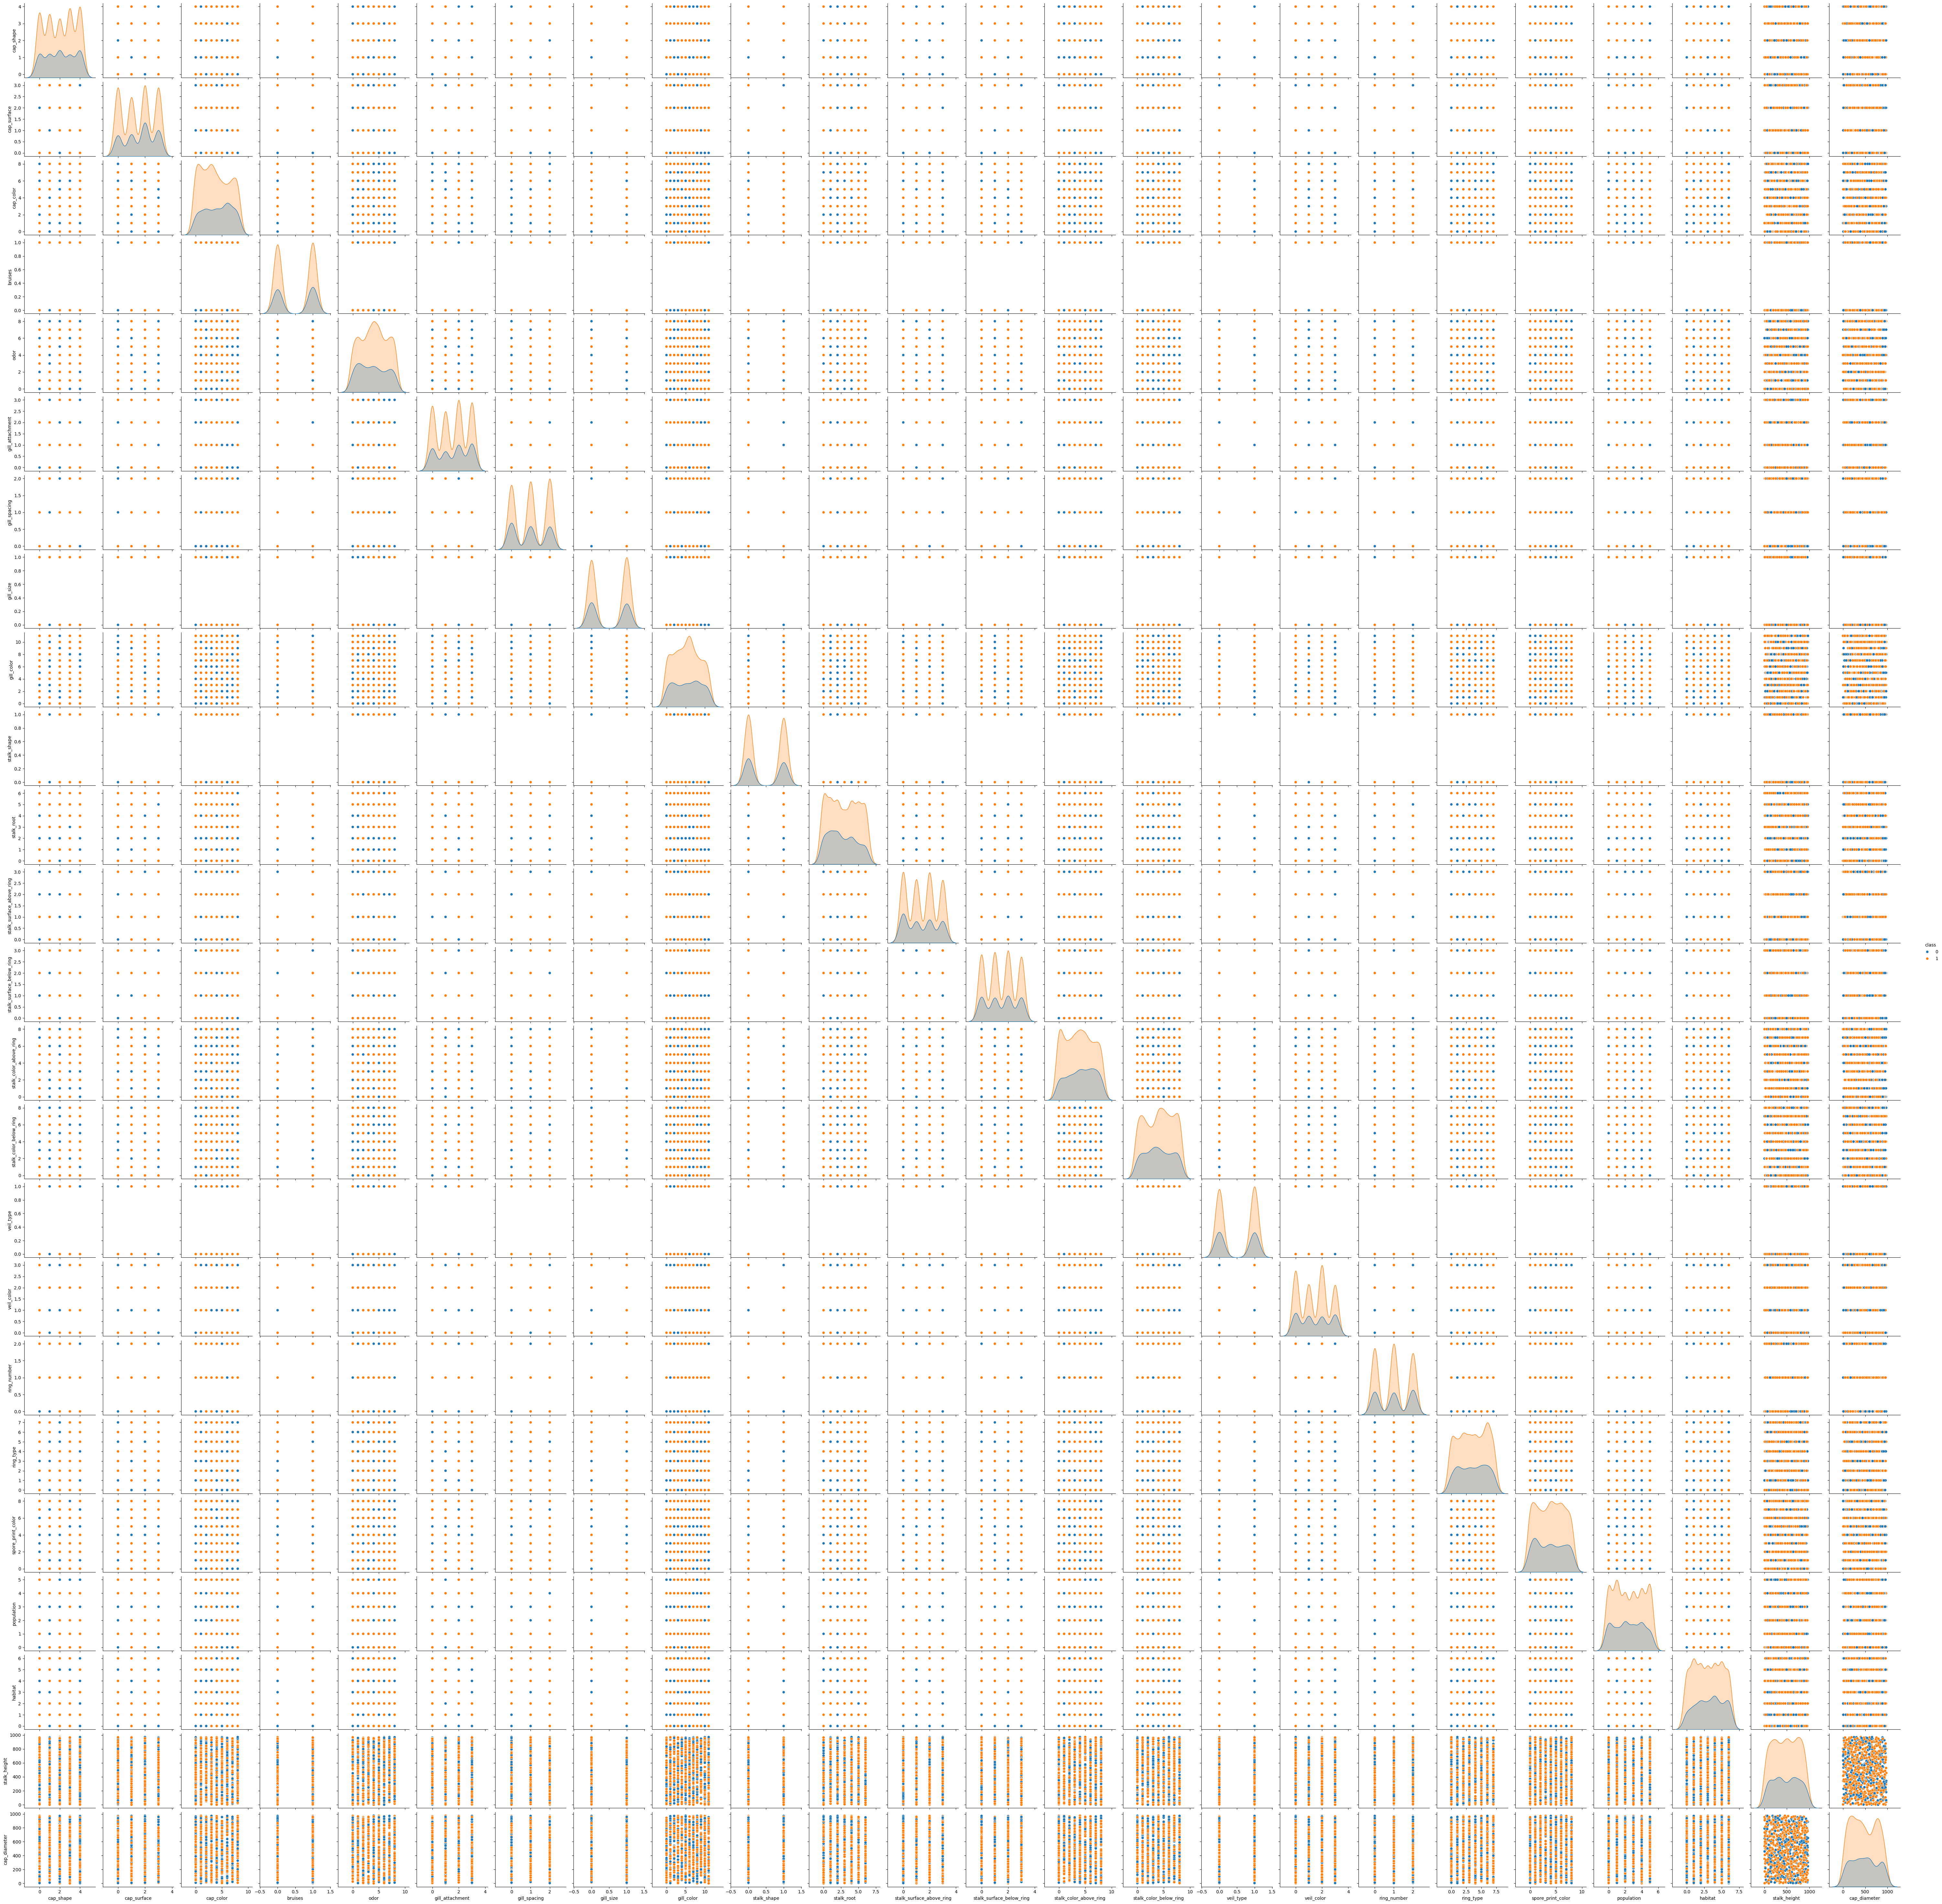

In [25]:
# Data Visualization
# Pair plot for visualizing feature relationships
sns.pairplot(encoded_data.iloc[:, 1:], hue='class', diag_kind='kde')
plt.show()

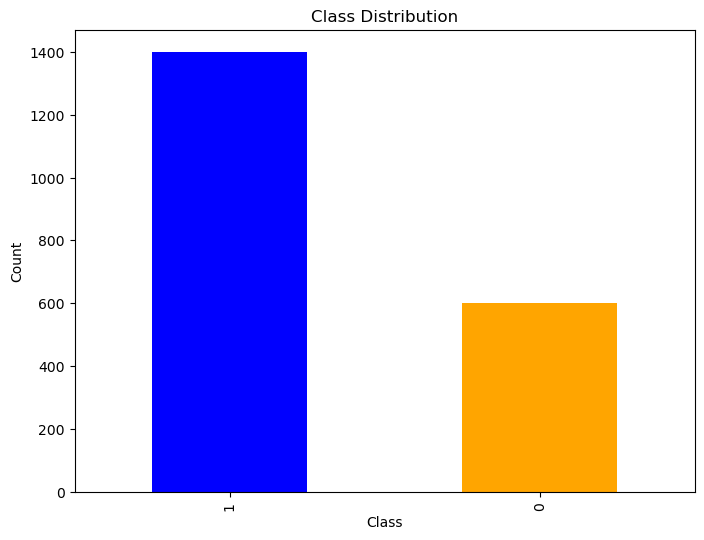

In [27]:
# Visualizing class distribution
plt.figure(figsize=(8, 6))
data['class'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [29]:
# SVM Implementation
# Initialize the SVM classifier
svm_model = SVC(kernel='rbf', random_state=42)

In [31]:
# Train the model
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [33]:
# Predict on test data
y_pred = svm_model.predict(X_test)

In [35]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600



Confusion Matrix:
 [[  0 185]
 [  0 415]]


Accuracy Score: 0.6916666666666667


C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
# Task 5: Visualization of SVM Results
# Visualizing decision boundaries
from matplotlib.colors import ListedColormap
X_vis = X_train.iloc[:, 1:3]  # Take features excluding the first for visualization
y_vis = y_train

In [39]:
svm_vis = SVC(kernel='rbf', random_state=42).fit(X_vis, y_vis)
x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


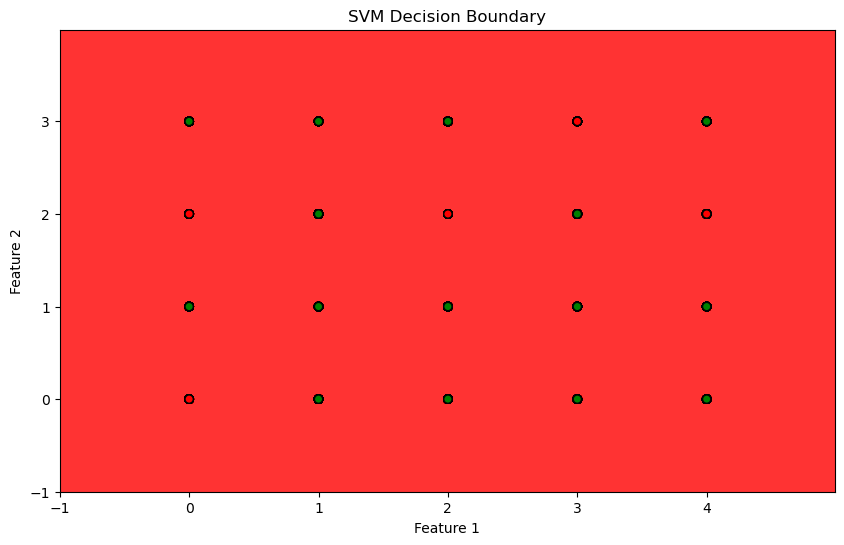

In [41]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_vis, edgecolor='k', cmap=ListedColormap(('red', 'green')))
plt.title("SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

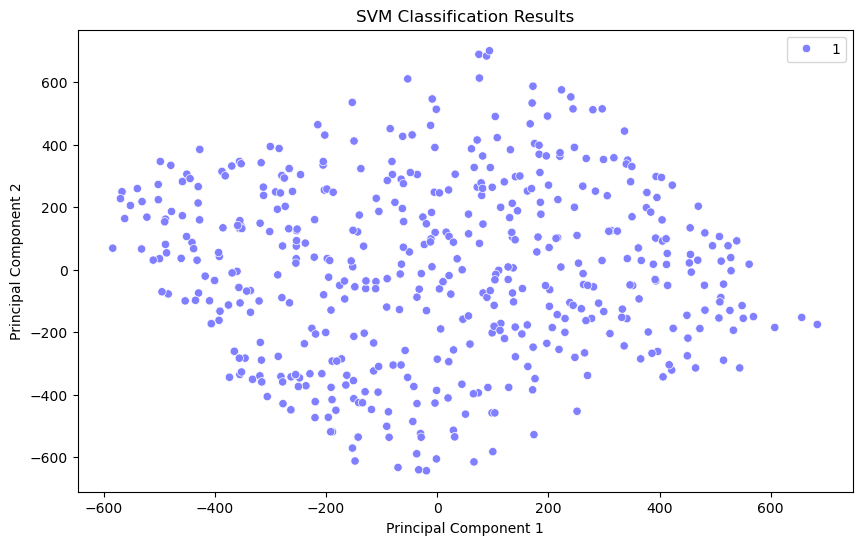

In [43]:
#Using PCM
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred, palette='cool', legend='full')
plt.title("SVM Classification Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [47]:
# Task 6: Parameter Tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

In [49]:
grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)  # Enable parallel processing
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [51]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [53]:
# Evaluate the best model
y_pred_best = grid_search.best_estimator_.predict(X_test)
print("Optimized Classification Report:\n", classification_report(y_test, y_pred_best))

Optimized Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.76       185
           1       0.85      1.00      0.92       415

    accuracy                           0.88       600
   macro avg       0.93      0.81      0.84       600
weighted avg       0.90      0.88      0.87       600



In [55]:
# Analysis of the tuned model
print("Optimized Accuracy Score:", accuracy_score(y_test, y_pred_best))

Optimized Accuracy Score: 0.8816666666666667


In [59]:
#Total Analysis
print("Optimized Classification Report:\n", classification_report(y_test, y_pred_best))

Optimized Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.76       185
           1       0.85      1.00      0.92       415

    accuracy                           0.88       600
   macro avg       0.93      0.81      0.84       600
weighted avg       0.90      0.88      0.87       600



In [61]:
# Compare kernels
kernels = ['linear', 'rbf']
results = {}

In [63]:
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred_kernel = model.predict(X_test)
    results[kernel] = accuracy_score(y_test, y_pred_kernel)

print("Kernel Comparison Results:", results)

Kernel Comparison Results: {'linear': 0.6916666666666667, 'rbf': 0.6916666666666667}


In [65]:
# Analysis
for kernel, score in results.items():
    print(f"Kernel: {kernel}, Accuracy: {score:.2f}")

Kernel: linear, Accuracy: 0.69
Kernel: rbf, Accuracy: 0.69


In [67]:
#Complete Analysis of Kernels (Including 'poly')
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    print(f"\nKernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

print("\nComparison of SVM performance with different kernels is shown above.")


Kernel: linear
Accuracy: 0.6916666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600


Kernel: poly
Accuracy: 0.6916666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600



C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashish\anaconda3\Lib\site-pa


Kernel: rbf
Accuracy: 0.6916666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600


Comparison of SVM performance with different kernels is shown above.


C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Practical implications of SVM in real-world classification tasks

SVM works well with complex boundary classification tasks, particularly when non-linear kernels like RBF are used. 
However, for best results, feature scaling and hyperparameter adjustment are essential.

In [ ]:
#------------------------------------------------------------FINSIH-----------------------------------------------------------------------------!